In [15]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /Users/arpit/Documents/Cat_vs_Dog/cats_and_dogs_filtered.zip
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/Users/arpit/Documents/Cat_vs_Dog/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Users/arpit/Documents/Cat_vs_Dog')
zip_ref.close()

--2022-01-14 00:40:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:400b:807::2010, 2607:f8b0:400b:80f::2010, 2607:f8b0:400b:80c::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:400b:807::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/Users/arpit/Documents/Cat_vs_Dog/cats_and_dogs_filtered.zip’

/Users/arpit/Docume 100%[===================>]  65.43M  68.2MB/s    in 1.0s    

2022-01-14 00:40:11 (68.2 MB/s) - ‘/Users/arpit/Documents/Cat_vs_Dog/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [13]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /Users/arpit/Documents/Cat_vs_Dog/cats_and_dogs_filtered.zip

--2022-01-14 00:39:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:400b:802::2010, 2607:f8b0:400b:807::2010, 2607:f8b0:400b:80f::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:400b:802::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/Users/arpit/Documents/Cat_vs_Dog/cats_and_dogs_filtered.zip’

/Users/arpit/Docume 100%[===================>]  65.43M  68.5MB/s    in 1.0s    

2022-01-14 00:39:21 (68.5 MB/s) - ‘/Users/arpit/Documents/Cat_vs_Dog/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [29]:
pwd = os.getcwd()
print(pwd)
base_dir = os.path.join(pwd ,'cats_and_dogs_filtered')
print(base_dir)

/Users/arpit/Documents/Cat_vs_Dog
/Users/arpit/Documents/Cat_vs_Dog/cats_and_dogs_filtered


In [30]:

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [31]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [32]:
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

/Users/arpit/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2022-01-14 01:18:04.275681: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-14 01:18:10.572757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 - 8s - loss: 0.6883 - accuracy: 0.5385 - val_loss: 0.6744 - val_accuracy: 0.5300
Epoch 2/100
100/100 - 7s - loss: 0.6593 - accuracy: 0.6085 - val_loss: 0.6430 - val_accuracy: 0.6500
Epoch 3/100
100/100 - 7s - loss: 0.6187 - accuracy: 0.6540 - val_loss: 0.6020 - val_accuracy: 0.6890
Epoch 4/100
100/100 - 7s - loss: 0.5656 - accuracy: 0.7155 - val_loss: 0.5724 - val_accuracy: 0.6920
Epoch 5/100
100/100 - 7s - loss: 0.5339 - accuracy: 0.7265 - val_loss: 0.5525 - val_accuracy: 0.7050
Epoch 6/100
100/100 - 7s - loss: 0.4952 - accuracy: 0.7560 - val_loss: 0.5605 - val_accuracy: 0.7140
Epoch 7/100
100/100 - 7s - loss: 0.4739 - accuracy: 0.7725 - val_loss: 0.5103 - val_accuracy: 0.7500
Epoch 8/100
100/100 - 7s - loss: 0.4437 - accuracy: 0.7965 - val_loss: 0.5205 - val_accuracy: 0.7330
Epoch 9/100
100/100 - 7s - loss: 0.4118 - accuracy: 0.8050 - val_loss: 0.5372 - val_accuracy: 0.7300
Epoch 10/100
100/100 - 7s - loss: 0.3900 - accuracy: 0.8245 - val_loss: 0.5347 - val_accuracy: 0.7440
E

KeyboardInterrupt: 

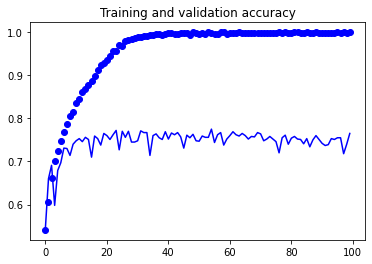

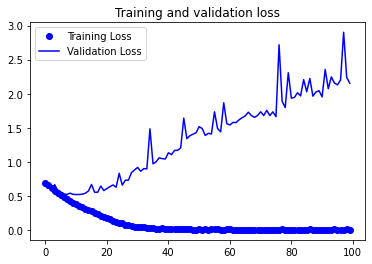

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [6]:

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/Users/arpit/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


2022-01-13 23:18:01.581328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-13 23:18:09.441069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 - 10s - loss: 0.6917 - accuracy: 0.5315 - val_loss: 0.6775 - val_accuracy: 0.5310
Epoch 2/100
100/100 - 9s - loss: 0.6816 - accuracy: 0.5620 - val_loss: 0.6713 - val_accuracy: 0.5830
Epoch 3/100
100/100 - 9s - loss: 0.6689 - accuracy: 0.5935 - val_loss: 0.6340 - val_accuracy: 0.6500
Epoch 4/100
100/100 - 9s - loss: 0.6501 - accuracy: 0.6215 - val_loss: 0.6095 - val_accuracy: 0.6630
Epoch 5/100
100/100 - 9s - loss: 0.6355 - accuracy: 0.6410 - val_loss: 0.5975 - val_accuracy: 0.6720
Epoch 6/100
100/100 - 8s - loss: 0.6015 - accuracy: 0.6775 - val_loss: 0.6590 - val_accuracy: 0.5920
Epoch 7/100
100/100 - 9s - loss: 0.6116 - accuracy: 0.6710 - val_loss: 0.5655 - val_accuracy: 0.7020
Epoch 8/100
100/100 - 8s - loss: 0.5948 - accuracy: 0.6805 - val_loss: 0.5453 - val_accuracy: 0.7190
Epoch 9/100
100/100 - 8s - loss: 0.5892 - accuracy: 0.6705 - val_loss: 0.5733 - val_accuracy: 0.6680
Epoch 10/100
100/100 - 9s - loss: 0.5724 - accuracy: 0.6915 - val_loss: 0.5301 - val_accuracy: 0.7330


In [1]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined